# Convolutional Neural Network for DRUJ with reduced resolution

February 2, 2022, Copy a


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from keras.models import model_from_json
from sklearn.model_selection import train_test_split

## Load data

I previously created a file with the combined data at reduced resolution.

In [2]:
ComboReduce = np.asarray(pd.read_csv('ComboReduceAugTrainVal.csv', header = None))

In [3]:
print(ComboReduce.shape)

(140500, 1050)


In [4]:
print(type(ComboReduce))

<class 'numpy.ndarray'>


In [5]:
ComboReduce = np.reshape(ComboReduce, (281, 500, 1050, 1))

Look at the combination view to make sure it is as expected. 

<function matplotlib.pyplot.show(close=None, block=None)>

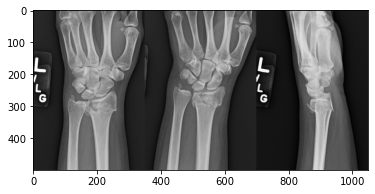

In [6]:
img = ComboReduce[0,:,:,0] 
plt.imshow(img, cmap='gray')  
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

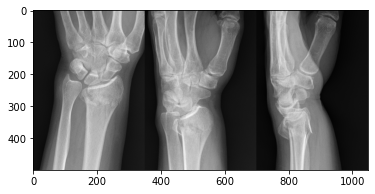

In [7]:
img = ComboReduce[250,:,:,0] 
plt.imshow(img, cmap='gray')  
plt.show

### Data Normalization

In [8]:
ComboReduce = ComboReduce/255.0

## Convolutional Neural Network

Load labels

In [10]:
DRUJLabels = np.asarray(pd.read_csv('DRUJLabelsOneHotTrainVal.csv', header = None))
DRUJLabels.shape

(281, 3)

### Divide the data into a training set and validation set

In [11]:
ComboTrain, ComboVal, yTrain, yVal = train_test_split(ComboReduce, DRUJLabels, test_size=0.20, stratify=DRUJLabels)

In [13]:
print("ComboTest shape = ", ComboVal.shape, "yTest shape = ", yVal.shape)
print("ComboTrain shape = ", ComboTrain.shape, "yTrain shape = ", yTrain.shape)

ComboTest shape =  (57, 500, 1050, 1) yTest shape =  (57, 3)
ComboTrain shape =  (224, 500, 1050, 1) yTrain shape =  (224, 3)


### Build the model

Create the model and add layers. 

In [14]:
model = Sequential()
model.add(Conv2D(128, kernel_size=5, activation='relu', input_shape=(500,1050,1)))
model.add(Conv2D(64, kernel_size=5, activation='relu'))
model.add(Conv2D(32, kernel_size=5, activation='relu'))
model.add(Conv2D(16, kernel_size=5, activation='relu'))

# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Dropout(0.1))

model.add(Flatten())

# model.add(Dense(27, activation='relu'))

model.add(Dense(3, activation='softmax'))

Compile the model. Use accuracy to measure model performance

In [15]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [16]:
model.compile(optimizer=opt, loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 496, 1046, 128)    3328      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 492, 1042, 64)     204864    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 488, 1038, 32)     51232     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 484, 1034, 16)     12816     
_________________________________________________________________
dropout (Dropout)            (None, 484, 1034, 16)     0         
_________________________________________________________________
flatten (Flatten)            (None, 8007296)           0         
_________________________________________________________________
dense (Dense)                (None, 3)                 2

## Train the model with 30 epochs.

In [18]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("model20220202a.h5", monitor='val_accuracy', 
                             verbose=1, save_best_only=True, save_weights_only=True, 
                             mode='auto')
early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

In [19]:
history = model.fit(ComboTrain, yTrain, epochs=30, validation_data=(ComboVal, yVal), callbacks=[checkpoint])

Epoch 1/30
7/7 [==============================] - 866s 124s/step - loss: 43.2060 - accuracy: 0.5000 - val_loss: 1.0969 - val_accuracy: 0.6140

Epoch 00001: val_accuracy improved from -inf to 0.61404, saving model to model20220202a.h5
Epoch 2/30
7/7 [==============================] - 851s 122s/step - loss: 1.0092 - accuracy: 0.6741 - val_loss: 0.8702 - val_accuracy: 0.6491

Epoch 00002: val_accuracy improved from 0.61404 to 0.64912, saving model to model20220202a.h5
Epoch 3/30
7/7 [==============================] - 849s 122s/step - loss: 0.8294 - accuracy: 0.6875 - val_loss: 0.9445 - val_accuracy: 0.6667

Epoch 00003: val_accuracy improved from 0.64912 to 0.66667, saving model to model20220202a.h5
Epoch 4/30
7/7 [==============================] - 853s 123s/step - loss: 1.9626 - accuracy: 0.6339 - val_loss: 1.0819 - val_accuracy: 0.6842

Epoch 00004: val_accuracy improved from 0.66667 to 0.68421, saving model to model20220202a.h5
Epoch 5/30
7/7 [==============================] - 849s 122

In [20]:
predict_x=model.predict(ComboVal) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)
print(predict_x)

[1 0 1 0 0 2 1 1 1 1 2 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 2 0 1 1 1 0
 0 2 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0]
[[1.46229267e-01 5.24307668e-01 3.29463154e-01]
 [5.52887380e-01 4.47069526e-01 4.30861801e-05]
 [9.68095947e-07 9.99999046e-01 8.83761675e-11]
 [9.93258476e-01 6.74156612e-03 3.99371046e-19]
 [1.00000000e+00 2.07115713e-15 5.57032417e-37]
 [5.39336726e-02 4.01897937e-01 5.44168472e-01]
 [4.09576713e-11 9.99999762e-01 2.49742556e-07]
 [7.49058276e-02 8.97029221e-01 2.80650388e-02]
 [8.51207460e-09 9.99972582e-01 2.74740541e-05]
 [2.87068605e-01 4.30961341e-01 2.81970114e-01]
 [7.91508248e-10 4.66980767e-24 1.00000000e+00]
 [3.47675959e-04 9.99652267e-01 4.02407802e-10]
 [9.74325597e-01 2.56743375e-02 7.21742452e-08]
 [4.28683145e-10 9.81410384e-01 1.85896568e-02]
 [3.91047915e-12 9.99999523e-01 5.21211916e-07]
 [2.12022258e-07 9.99999762e-01 3.64662717e-10]
 [1.36765631e-12 1.00000000e+00 9.26671934e-14]
 [6.09371305e-01 3.53346169e-02 3.55294079e-01]
 [1.64256222e-03 9.

In [21]:
DRUJLabelsVal = []

for i in range(len(yVal)):
    if yVal[i,0]==1: 
        temp = 0
    if yVal[i,1]==1:
        temp = 1
    if yVal[i,2]==1:
        temp = 2
    DRUJLabelsVal = np.append(DRUJLabelsVal,temp)
    
print(DRUJLabelsVal)

DRUJLabelsTrain = []

for i in range(len(yTrain)):
    if yTrain[i,0]==1: 
        temp = 0
    if yTrain[i,1]==1:
        temp = 1
    if yTrain[i,2]==1:
        temp = 2
    DRUJLabelsTrain = np.append(DRUJLabelsTrain,temp)
    
print(DRUJLabelsTrain)

[1. 1. 1. 0. 0. 2. 1. 2. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 2. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 2. 1. 1. 0. 1. 0. 1. 1. 1.]
[1. 2. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 2. 2. 2. 1. 1. 1. 0. 2. 1.
 2. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 2. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 2. 1. 0. 2. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 2. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 2. 1. 1. 2. 0. 1. 1. 1. 0. 1. 1. 1. 2. 1. 1. 1. 1.
 1. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 0. 1. 1. 1. 1. 2.]


In [22]:
# serialize model to JSON
model_json = model.to_json()
with open("model20220202a.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model20220202a1.h5")
print("Saved model to disk")

Saved model to disk


## Data Visualizations for CNN Model

Plots of Loss versus Epoch - Display to screen and save to file

In [23]:
history.history

{'loss': [43.20595169067383,
  1.0092498064041138,
  0.8294366002082825,
  1.9626449346542358,
  1.033284306526184,
  0.9077826738357544,
  0.8252477645874023,
  0.6938400864601135,
  0.5497257113456726,
  0.4164067208766937,
  0.4556123912334442,
  0.5887031555175781,
  0.5581018328666687,
  0.1913353055715561,
  0.09222196042537689,
  0.01534657459706068,
  0.006222895346581936,
  0.00163807172793895,
  0.023445477709174156,
  0.05715026706457138,
  0.005319019313901663,
  0.020420005545020103,
  0.01693659834563732,
  2.2705740775563754e-05,
  0.339109867811203,
  0.2770937383174896,
  0.17600032687187195,
  0.3177029490470886,
  0.19029800593852997,
  0.30899015069007874],
 'accuracy': [0.5,
  0.6741071343421936,
  0.6875,
  0.6339285969734192,
  0.6875,
  0.6830357313156128,
  0.7142857313156128,
  0.7410714030265808,
  0.8125,
  0.8705357313156128,
  0.8883928656578064,
  0.8839285969734192,
  0.8928571343421936,
  0.9642857313156128,
  0.9821428656578064,
  0.9955357313156128,
 

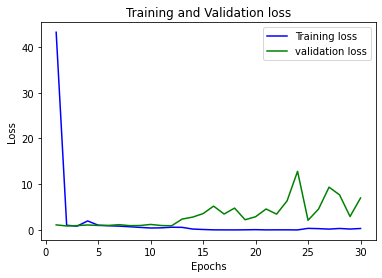

In [24]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'b', label='Training loss')
plt.plot(epochs, loss_val, 'g', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Loss20220202a.png')

Plots of Accuracy versus Epochs - Display to screen and save to file

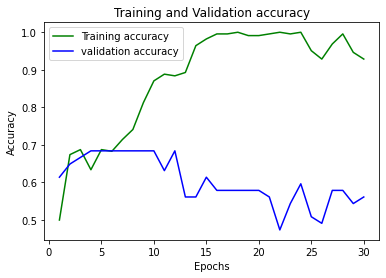

In [25]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Accuracy202200202a.png')

In [26]:
lossacc = np.stack((loss_train, loss_val, acc_train, acc_val), axis = 1)
np.savetxt('LossAcc202200202a.csv', lossacc, delimiter=",")

Confusion Matrix for the Validation Set

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
ConfMatrixModel = confusion_matrix(DRUJLabelsVal, classes_x)
ConfMatrixModeldf = pd.DataFrame(ConfMatrixModel,
                     index = ['I','II','III'], 
                     columns = ['I','II','III'])
ConfMatrixModeldf['Actual Sum'] = ConfMatrixModeldf.sum(axis=1)
PredictedSum = ConfMatrixModeldf.sum(axis=0)
ConfMatrixModeldf.loc[len(ConfMatrixModeldf.index)] = [PredictedSum[0], PredictedSum[1], PredictedSum[2], PredictedSum[3]]
ConfMatrixModeldf.index = ['I', 'II', 'III', 'Predicted Sum']
ConfMatrixModeldf

,I,II,III,Actual Sum
I,6,8,0,14
II,11,25,3,39
III,1,2,1,4
Predicted Sum,18,35,4,57


Confusion Matrix for the Training Set

In [29]:
predict_xTrain=model.predict(ComboTrain) 
classes_xTrain=np.argmax(predict_xTrain,axis=1)

In [30]:
ConfMatrixModel = confusion_matrix(DRUJLabelsTrain, classes_xTrain)
ConfMatrixModeldf = pd.DataFrame(ConfMatrixModel,
                     index = ['I','II','III'], 
                     columns = ['I','II','III'])
ConfMatrixModeldf['Actual Sum'] = ConfMatrixModeldf.sum(axis=1)
PredictedSum = ConfMatrixModeldf.sum(axis=0)
ConfMatrixModeldf.loc[len(ConfMatrixModeldf.index)] = [PredictedSum[0], PredictedSum[1], PredictedSum[2], PredictedSum[3]]
ConfMatrixModeldf.index = ['I', 'II', 'III', 'Predicted Sum']
ConfMatrixModeldf

,I,II,III,Actual Sum
I,51,2,0,53
II,2,151,0,153
III,0,0,18,18
Predicted Sum,53,153,18,224


Confusion Matrix for the Test Set

In [38]:
ComboTest = np.asarray(pd.read_csv('ComboReduceAugTest.csv', header = None))
ComboTest = ComboTest/255
ComboTest = np.reshape(ComboTest, (30, 500, 1050, 1))
yTest = np.asarray(pd.read_csv('DRUJLabelsOneHotTest.csv', header = None))

In [54]:
DRUJLabelsTest = []

for i in range(len(yTest)):
    if yTest[i,0]==1: 
        temp = 0
    if yTest[i,1]==1:
        temp = 1
    if yTest[i,2]==1:
        temp = 2
    DRUJLabelsTest = np.append(DRUJLabelsTest,temp)

In [40]:
predict_xTest=model.predict(ComboTest) 
classes_xTest=np.argmax(predict_xTest,axis=1)

In [55]:
ConfMatrixModel = confusion_matrix(DRUJLabelsTest, classes_xTest)
ConfMatrixModeldf = pd.DataFrame(ConfMatrixModel,
                     index = ['I','II','III'], 
                     columns = ['I','II','III'])
ConfMatrixModeldf['Actual Sum'] = ConfMatrixModeldf.sum(axis=1)
PredictedSum = ConfMatrixModeldf.sum(axis=0)
ConfMatrixModeldf.loc[len(ConfMatrixModeldf.index)] = [PredictedSum[0], PredictedSum[1], PredictedSum[2], PredictedSum[3]]
ConfMatrixModeldf.index = ['I', 'II', 'III', 'Predicted Sum']
ConfMatrixModeldf

,I,II,III,Actual Sum
I,2,3,1,6
II,7,16,0,23
III,0,1,0,1
Predicted Sum,9,20,1,30


## Load saved model with best validation accuracy

In [32]:
# load json and create model
json_file = open('model20220202a.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('model20220202a.h5')
print("Loaded model from disk")

Loaded model from disk


Accuracy of saved model on Training Set

In [33]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(ComboTrain, yTrain, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 69.64%


Accuracy of saved model on Validation Set

In [34]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(ComboVal, yVal, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 68.42%


Accuracy of saved model on Test Set

In [ ]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(ComboTest, yTest, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Confusion matrix for Validation Set

In [ ]:
predict_LxVal=loaded_model.predict(ComboVal) 
classes_LxVal=np.argmax(predict_LxVal,axis=1)

In [ ]:
ConfMatrixModel = confusion_matrix(DRUJLabelsVal, classes_LxVal)
ConfMatrixModeldf = pd.DataFrame(ConfMatrixModel,
                     index = ['I','II','III'], 
                     columns = ['I','II','III'])
ConfMatrixModeldf['Actual Sum'] = ConfMatrixModeldf.sum(axis=1)
PredictedSum = ConfMatrixModeldf.sum(axis=0)
ConfMatrixModeldf.loc[len(ConfMatrixModeldf.index)] = [PredictedSum[0], PredictedSum[1], PredictedSum[2], PredictedSum[3]]
ConfMatrixModeldf.index = ['I', 'II', 'III', 'Predicted Sum']
ConfMatrixModeldf

Confusion matrix for Training Set

In [44]:
predict_LxTrain=loaded_model.predict(ComboTrain) 
classes_LxTrain=np.argmax(predict_LxTrain,axis=1)

In [45]:
ConfMatrixModel = confusion_matrix(DRUJLabelsTrain, classes_LxTrain)
ConfMatrixModeldf = pd.DataFrame(ConfMatrixModel,
                     index = ['I','II','III'], 
                     columns = ['I','II','III'])
ConfMatrixModeldf['Actual Sum'] = ConfMatrixModeldf.sum(axis=1)
PredictedSum = ConfMatrixModeldf.sum(axis=0)
ConfMatrixModeldf.loc[len(ConfMatrixModeldf.index)] = [PredictedSum[0], PredictedSum[1], PredictedSum[2], PredictedSum[3]]
ConfMatrixModeldf.index = ['I', 'II', 'III', 'Predicted Sum']
ConfMatrixModeldf

,I,II,III,Actual Sum
I,3,50,0,53
II,0,153,0,153
III,0,18,0,18
Predicted Sum,3,221,0,224


Confusion matrix for Test Set

In [43]:
predict_LxTest=loaded_model.predict(ComboTest) 
classes_LxTest=np.argmax(predict_LxTest,axis=1)

In [56]:
ConfMatrixModel = confusion_matrix(DRUJLabelsTest, classes_LxTest)
ConfMatrixModeldf = pd.DataFrame(ConfMatrixModel,
                     index = ['I','II','III'], 
                     columns = ['I','II','III'])
ConfMatrixModeldf['Actual Sum'] = ConfMatrixModeldf.sum(axis=1)
PredictedSum = ConfMatrixModeldf.sum(axis=0)
ConfMatrixModeldf.loc[len(ConfMatrixModeldf.index)] = [PredictedSum[0], PredictedSum[1], PredictedSum[2], PredictedSum[3]]
ConfMatrixModeldf.index = ['I', 'II', 'III', 'Predicted Sum']
ConfMatrixModeldf

,I,II,III,Actual Sum
I,0,6,0,6
II,0,23,0,23
III,0,1,0,1
Predicted Sum,0,30,0,30
